In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('../lib/TrackObs/'))
sys.path.insert(0, os.path.abspath('../lib/CosmicObservation/'))
from CosmicObservation import *

import glob
import re
from astropy.io import fits

In [8]:
#source = 'BAM-OBS'
#infiles = [sorted(glob.glob('../output/BAM/2017/09/14/BAM-OBS1*'))[0]]

#source = 'BAM-SIF'
#infiles = [sorted(glob.glob('../output/BAM-SIF/2016/01/03/BAM-SIF_OBMT_START_68788023940519100.fits'))[0]]

source = 'SM-SIF'
infiles = sorted(glob.glob('../output/SM/2017/09/14/*'))


tread = []
tprocess = []
twrite = []

import time
tt = time.time()
def tstep():
    global tt
    tnew = time.time()
    tstep = tnew-tt
    tt = tnew
    return tstep

for f in infiles:
    # read the data
    trobslist = read_Obslist_fits(f)

    tread.append(tstep())

    cobslist = []

    for ii in range(len(trobslist)):
        trobs = trobslist[ii]
        cobs = CosmicObservation.from_TrackObs(trobs)
        cobslist.append(cobs)
        

    tprocess.append(tstep())

    
    write_list_to_fits(cobslist, 'tmp_output/'+source+'_{}.fits'.format(int(cobslist[0].acqTime)))
    twrite.append(tstep())

In [12]:
OBMT_apyTime(133309970788532304).isot

'2018-01-18T18:46:12.580'

Reading 0.457432746887
Processing 0.956164121628
Writing 0.238836765289
Total time: 1.6524336338


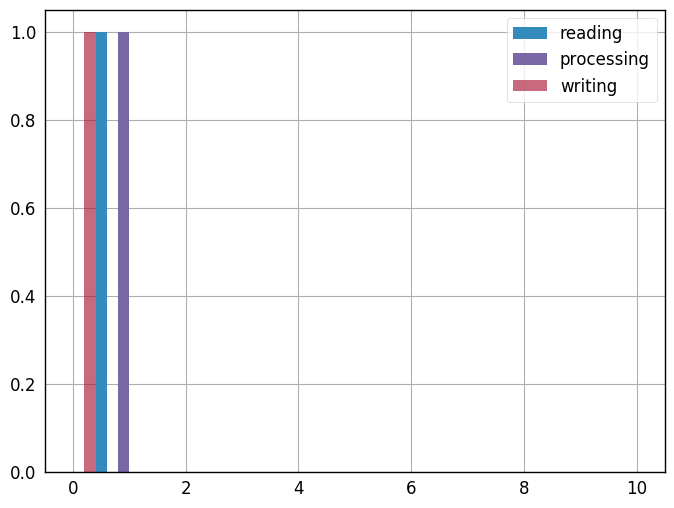

In [9]:
h1 = plt.hist(tread,50,range=(0,10),label='reading')
h2 = plt.hist(tprocess,50,range=(0,10),label='processing')
h3 = plt.hist(twrite,50,range=(0,10),label='writing',alpha=0.6)

plt.legend(loc='best')

print('Reading', np.sum(tread))
print('Processing', np.sum(tprocess))
print('Writing', np.sum(twrite))

print('Total time:',np.sum(tread+tprocess+twrite))